###Predicting Air pressure system failures in Scania trucks
The dataset is made up of data collected from heavy Scania trucks that are used on a daily basis. The Air Pressure System (APS) is the system in question, which generates pressurized air that is used in a truck's various functions, such as braking and gear changes. Component failures for a specific component of the APS system make up the datasets' positive class. Trucks in the negative class have failed components that aren't related to the APS. The training set contains a total of 60000 examples, with 59000 in the negative class and 1000 in the positive class. There are 16000 examples in the test set. Each record has 171 attributes.

In [1]:
#importing all the packages required
import pandas as pd
import numpy as np
from google.colab import drive
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
from keras.callbacks import EarlyStopping
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input, Dense, SimpleRNN
from sklearn.neural_network import MLPClassifier
from keras.layers.embeddings import Embedding
import numpy
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix, plot_confusion_matrix
from numpy.random import seed
seed(1)

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
datafiles_path = "/content/drive/My Drive/project"
datafiles_names = os.listdir(path=datafiles_path)

In [4]:
print(datafiles_names[:3])

['aps_failure_description.txt', 'aps_failure_training_set.csv', 'aps_failure_test_set.csv']


##Loading Dataset


In [5]:
train = pd.read_csv('/content/drive/My Drive/project/aps_failure_training_set.csv', na_values='na')
test =  pd.read_csv('/content/drive/My Drive/project/aps_failure_test_set.csv', na_values='na')

In [6]:
train.shape

(60000, 171)

In [7]:
test.shape

(16000, 171)

In [8]:
train.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

##Exploration


In [9]:
train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [10]:
test.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.600000e+04,3637.000000,1.507400e+04,12019.000000,15310.000000,15310.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,...,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15238.000000,15238.000000
mean,6.799698e+04,0.772065,3.580393e+08,439.498794,6.428347,10.195950,120.858516,2.064204e+03,1.379236e+04,1.126276e+05,...,4.649135e+05,2.212010e+05,4.690886e+05,4.256696e+05,3.559239e+05,3.524014e+05,1.442759e+05,8.560355e+03,0.064969,0.242683
std,5.035350e+05,2.589224,7.966968e+08,1551.328109,118.186469,167.260463,6454.660300,8.925778e+04,2.358405e+05,1.025843e+06,...,1.255197e+06,5.828691e+05,1.267550e+06,1.259560e+06,1.199544e+06,1.628545e+06,5.368225e+05,5.329946e+04,3.374657,14.339059
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.280000e+02,0.000000,1.600000e+01,26.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,3.178000e+03,1.256000e+03,2.883500e+03,3.869500e+03,6.100000e+02,1.240000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.098200e+04,0.000000,1.590000e+02,130.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.409860e+05,1.147800e+05,2.297080e+05,1.956510e+05,9.657000e+04,4.201300e+04,3.985000e+03,0.000000e+00,0.000000,0.000000
75%,4.947900e+04,0.000000,1.003500e+03,430.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.391320e+05,2.189510e+05,4.714860e+05,4.034105e+05,2.790355e+05,1.699100e+05,1.389310e+05,1.907000e+03,0.000000,0.000000
max,4.294967e+07,58.000000,2.130707e+09,87038.000000,11044.000000,14186.000000,736174.000000,1.047252e+07,1.914916e+07,7.305747e+07,...,5.382333e+07,2.207969e+07,4.859750e+07,5.604348e+07,4.215944e+07,4.747137e+07,1.718575e+07,4.570398e+06,340.000000,1720.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB


##Null Ratio
Lets have a look at the null ratio of the features.

In [13]:
NULL_RATIO_TRHESHOLD = 0 # Set the null ratio threshold required


null_ratios = (train.isnull().sum() / train.shape[0])
null_ratios_over_threshold = null_ratios[null_ratios > NULL_RATIO_TRHESHOLD].sort_values(ascending=False)

data = [
    go.Bar(
        x=null_ratios_over_threshold.index,
        y=null_ratios_over_threshold
    )
]

fig = go.Figure(data=data, layout={
    "title": "Null Ratio for Features with Null Ratio Exceeding {}".format(NULL_RATIO_TRHESHOLD)
})

plotly.offline.iplot(fig)


We have quite a few features with a null ratio of more than 70%! Dropping high null ratio features from cross-validation grid search will be added later.

##correlation
###Let's have a look at the feature correlations.

In [14]:
train.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.073103,-0.032055,-0.001903,0.061971,0.089474,0.018610,0.143153,0.285815,0.495529,...,0.735324,0.739211,0.717810,0.727240,0.726984,0.606232,0.471707,0.248039,0.019865,0.037099
ab_000,0.073103,1.000000,-0.019411,0.047281,0.031031,0.053532,0.008418,0.013658,0.050068,0.068100,...,0.062280,0.098808,0.068790,0.078091,0.048717,0.023867,0.039369,0.074119,0.055590,0.162948
ac_000,-0.032055,-0.019411,1.000000,-0.002380,-0.004997,-0.010554,0.017620,-0.001088,-0.016665,-0.038680,...,-0.013692,-0.008111,-0.009849,-0.011206,-0.021430,-0.029417,0.016908,0.024354,-0.006571,0.014228
ad_000,-0.001903,0.047281,-0.002380,1.000000,-0.000214,-0.000269,-0.000047,-0.000131,-0.000222,-0.000423,...,-0.002090,-0.002047,-0.001940,-0.001667,-0.001398,-0.000829,-0.002161,-0.001050,-0.000102,-0.000120
ae_000,0.061971,0.031031,-0.004997,-0.000214,1.000000,0.823108,-0.000430,-0.000832,0.005057,0.034163,...,0.017338,0.024905,0.017311,0.039967,0.085884,0.052357,-0.010850,-0.008206,0.070886,0.041715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.606232,0.023867,-0.029417,-0.000829,0.052357,0.070306,0.000307,0.044186,0.182990,0.505565,...,0.454833,0.446803,0.437682,0.379892,0.545929,1.000000,0.224938,0.061478,-0.000715,0.002708
ee_008,0.471707,0.039369,0.016908,-0.002161,-0.010850,-0.013976,-0.000823,0.004878,0.009466,0.021151,...,0.453811,0.481392,0.459517,0.406920,0.373871,0.224938,1.000000,0.710056,-0.006991,-0.002833
ee_009,0.248039,0.074119,0.024354,-0.001050,-0.008206,-0.010237,-0.001230,-0.004309,-0.009498,-0.019311,...,0.228248,0.239302,0.224638,0.190667,0.163792,0.061478,0.710056,1.000000,-0.003942,-0.000907
ef_000,0.019865,0.055590,-0.006571,-0.000102,0.070886,0.106281,-0.000072,0.002875,0.011824,0.020560,...,0.007118,0.017480,0.005835,0.050270,0.008461,-0.000715,-0.006991,-0.003942,1.000000,0.282184


Compute the feature correlation matrix.

In [15]:
corr = train[train.columns.difference(["class"])].corr()
corr.shape

(170, 170)

In [16]:
trace = go.Heatmap(z=corr.values,
                   x=corr.columns,
                   y=corr.index)

fig = go.Figure([trace], layout={
    "title": "Feature Correlations"
})
plotly.offline.iplot(fig)

We can see some clusters of highly correlated features.

##Target class distribution


In [17]:
class_value_counts = train["class"].value_counts()

trace = go.Pie(labels=class_value_counts.index, 
               values=class_value_counts.values,
               marker={
                   "colors": ["blue", "red"]
               })

data = [trace]
layout = go.Layout(title="Target Class Distribution for Training Set")

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

It appears that we have a dataset that is extremely unbalanced! 


In [18]:
#Class label Preprocessing
train_labels = train['class']
test_labels = test['class']
train_features = train.drop('class', axis=1)
test_features = test.drop('class', axis=1)

train_labels = train_labels.replace({'neg':0, 'pos' : 1})
test_labels = test_labels.replace({'neg':0, 'pos' : 1})

In [19]:
#checking class feature
train ["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

##Handling Missing Data

In [20]:
#Missing Value Analysis
miss_val = pd.DataFrame(train_features.isnull().sum())
miss_val = miss_val.reset_index()
miss_val = miss_val.rename(columns = {'index': 'Predictors', 0: 'Missing_Percentage'})
miss_val['Missing_Percentage'] = (miss_val['Missing_Percentage']/len(train_features))*100
miss_val = miss_val.sort_values('Missing_Percentage', ascending = False).reset_index(drop = True)
miss_val.head()

,Predictors,Missing_Percentage
0,br_000,82.106667
1,bq_000,81.203333
2,bp_000,79.566667
3,bo_000,77.221667
4,cr_000,77.215000


In [21]:
#Dropping Columns that have more than 35% missing values
dropped = list(miss_val.loc[miss_val['Missing_Percentage'] > 35,'Predictors'])
train_features.drop(columns = dropped, inplace = True)
test_features.drop(columns = dropped, inplace = True)

In [22]:
#Feature Scaling
scaler = MinMaxScaler()
scaler.fit(train_features)
train_features = pd.DataFrame(scaler.transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(scaler.transform(test_features), columns=test_features.columns)

In [23]:
#Imputing Missing Values
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer.fit(train_features)
train_features = pd.DataFrame(imputer.transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(imputer.transform(test_features), columns=test_features.columns)

In [24]:
train_features.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.027925,9.999998e-01,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000007,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,0.000010,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000191,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


In [25]:
test_features.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.000022,9.386557e-09,1.397901e-09,0.0,0.0,0.0,0.0,0.0,0.000042,2.069654e-05,...,0.000014,0.000004,0.000004,0.000011,0.000002,7.359084e-07,0.000000,0.000000,0.0,0.0
1,0.000030,3.191429e-08,4.659671e-09,0.0,0.0,0.0,0.0,0.0,0.000000,3.268794e-06,...,0.000014,0.000007,0.000017,0.000002,0.000003,3.863519e-06,0.000000,0.000000,0.0,0.0
2,0.024031,9.949750e-08,1.304708e-08,0.0,0.0,0.0,0.0,0.0,0.003146,5.936864e-03,...,0.006353,0.010074,0.004530,0.004693,0.041604,1.285164e-03,0.000027,0.000000,0.0,0.0
3,0.021778,4.740211e-07,1.090363e-07,0.0,0.0,0.0,0.0,0.0,0.000000,5.415448e-04,...,0.006939,0.006443,0.004975,0.008450,0.013648,1.756764e-03,0.014619,0.000848,0.0,0.0
4,0.000660,7.321514e-08,1.630885e-08,0.0,0.0,0.0,0.0,0.0,0.000000,3.146433e-07,...,0.000098,0.000110,0.000190,0.000867,0.000100,4.030771e-06,0.000004,0.000000,0.0,0.0


##without removing correlated features

In [26]:
train_features.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.027925,9.999998e-01,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000007,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,0.000010,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000191,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


In [27]:
#Dimensionality Reduction using SelectKBest (without removing correlated features)
selectKBest = SelectKBest(chi2, k=160)
selectKBest.fit(train_features, train_labels)
best_train_features = selectKBest.transform(train_features)
idxs_selected = selectKBest.get_support(indices=True)
best_train_features = train_features.iloc[:,idxs_selected]
best_test_features = test_features.iloc[:,idxs_selected]

In [28]:
best_train_features.shape

(60000, 160)

In [29]:
best_test_features.shape

(16000, 160)

In [30]:
#Balancing the dataset
number_samples = 2500
idxs_pos = train_labels[train_labels==1].index
idxs_neg = train_labels[train_labels==0].sample(n=number_samples, replace=False, random_state=0).index
idxs_balanced = np.concatenate((idxs_pos,idxs_neg))
best_train_features_balanced = best_train_features.loc[idxs_balanced]
train_labels_balanced = train_labels.loc[idxs_balanced]
print(f'Proportion balanced: {number_samples/1000}/1')

Proportion balanced: 2.5/1


In [31]:
best_train_features_balanced.shape

(3500, 160)

In [32]:
train_labels_balanced

9        1
23       1
60       1
115      1
135      1
        ..
44157    0
28771    0
2938     0
53716    0
44905    0
Name: class, Length: 3500, dtype: int64

In [33]:
train_labels_balanced.value_counts()

0    2500
1    1000
Name: class, dtype: int64

##train test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(best_train_features_balanced, train_labels_balanced, test_size=0.1, random_state=3)

In [35]:
ele = [X_train, X_test, y_train, y_test]
for element in ele:
    print(element.shape)

(3150, 160)
(350, 160)
(3150,)
(350,)


In [36]:
print(y_train.value_counts())
print(y_test.value_counts())

0    2247
1     903
Name: class, dtype: int64
0    253
1     97
Name: class, dtype: int64


##Building a basic neural network

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 160))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_pred_t = classifier.predict(X_test)

Epoch 1/10
315/315 [==============================] - 1s 2ms/step - loss: 0.5148 - accuracy: 0.8749
Epoch 2/10
315/315 [==============================] - 1s 2ms/step - loss: 0.2012 - accuracy: 0.9460
Epoch 3/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1662 - accuracy: 0.9467
Epoch 4/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1580 - accuracy: 0.9492
Epoch 5/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1541 - accuracy: 0.9492
Epoch 6/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1506 - accuracy: 0.9495
Epoch 7/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1479 - accuracy: 0.9514
Epoch 8/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1450 - accuracy: 0.9508
Epoch 9/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1426 - accuracy: 0.9514
Epoch 10/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1405 - accuracy: 0.9524

In [39]:
#Evaluating the basic neural network (validation dataset)
y_pred_t = (y_pred_t > 0.5)
report = classification_report(y_test, y_pred_t)
print(report)
cm = confusion_matrix(y_test, y_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       253
           1       0.91      0.88      0.89        97

    accuracy                           0.94       350
   macro avg       0.93      0.92      0.93       350
weighted avg       0.94      0.94      0.94       350

Total cost is: 6080.0


In [40]:
history=classifier.fit(best_train_features_balanced, train_labels_balanced, batch_size = 10, epochs = 10)
y_pred = classifier.predict(best_test_features)

Epoch 1/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1409 - accuracy: 0.9523
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1381 - accuracy: 0.9517
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1353 - accuracy: 0.9531
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1328 - accuracy: 0.9531
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1305 - accuracy: 0.9537
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1280 - accuracy: 0.9543
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1252 - accuracy: 0.9554
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9557
Epoch 9/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1204 - accuracy: 0.9580
Epoch 10/10
350/350 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9586

In [41]:
#Evaluating the basic neural network (test dataset)
y_pred = (y_pred > 0.5)
report = classification_report(test_labels, y_pred)
print(report)
cm = confusion_matrix(test_labels, y_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.40      0.95      0.56       375

    accuracy                           0.97     16000
   macro avg       0.70      0.96      0.77     16000
weighted avg       0.98      0.97      0.97     16000

Total cost is: 14810.0


In [42]:
confusion_matrix(test_labels, y_pred)

array([[15094,   531],
       [   19,   356]])

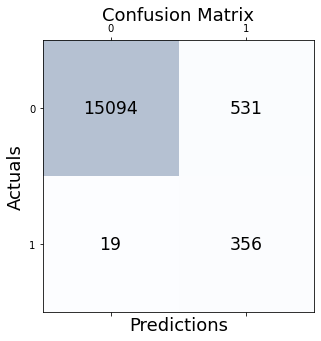

In [88]:
conf_matrix=confusion_matrix(test_labels, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [44]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


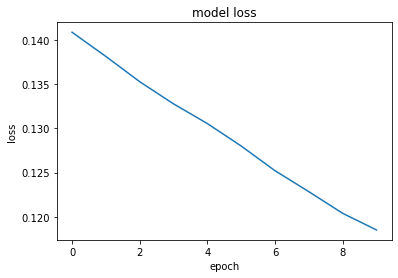

In [45]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AREA UNDER ROC:  0.9576746666666667


<function matplotlib.pyplot.show>

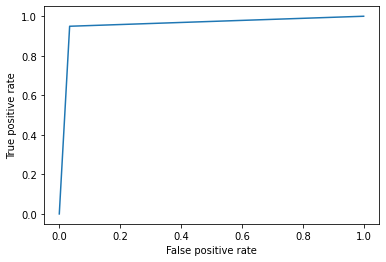

In [46]:
#AUROC
ann_auc=roc_auc_score(test_labels,y_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,y_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

##Building a Recurrent Neural Network

In [47]:
# Set up parameters
time_steps = 160
hidden_units = 2
epochs = 30

In [48]:
# Create a traditional RNN network
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mse', optimizer='adam')
    return model

In [49]:
model_RNN = create_RNN(hidden_units=hidden_units, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_RNN.fit(X_train, y_train, epochs=10, batch_size=10, verbose=2)
yy_pred_t = model_RNN.predict(X_test)

Epoch 1/10
315/315 - 6s - loss: 0.2312 - 6s/epoch - 19ms/step
Epoch 2/10
315/315 - 5s - loss: 0.0980 - 5s/epoch - 16ms/step
Epoch 3/10
315/315 - 5s - loss: 0.0751 - 5s/epoch - 17ms/step
Epoch 4/10
315/315 - 5s - loss: 0.0705 - 5s/epoch - 16ms/step
Epoch 5/10
315/315 - 6s - loss: 0.0660 - 6s/epoch - 19ms/step
Epoch 6/10
315/315 - 5s - loss: 0.0652 - 5s/epoch - 17ms/step
Epoch 7/10
315/315 - 5s - loss: 0.0636 - 5s/epoch - 16ms/step
Epoch 8/10
315/315 - 7s - loss: 0.0658 - 7s/epoch - 24ms/step
Epoch 9/10
315/315 - 12s - loss: 0.0637 - 12s/epoch - 37ms/step
Epoch 10/10
315/315 - 12s - loss: 0.0611 - 12s/epoch - 40ms/step


In [51]:
#Evaluating the Recurrent Neural Network(validation dataset)
yy_pred_t = (yy_pred_t > 0.5)
report = classification_report(y_test, yy_pred_t)
print(report)
cm = confusion_matrix(y_test, yy_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       253
           1       0.87      0.85      0.86        97

    accuracy                           0.92       350
   macro avg       0.91      0.90      0.90       350
weighted avg       0.92      0.92      0.92       350

Total cost is: 7620.0


In [52]:
history=model_RNN.fit(best_train_features_balanced, train_labels_balanced, epochs=10, batch_size=10, verbose=2)
yy_pred = model_RNN.predict(best_test_features)

Epoch 1/10
350/350 - 7s - loss: 0.0613 - 7s/epoch - 20ms/step
Epoch 2/10
350/350 - 6s - loss: 0.0611 - 6s/epoch - 17ms/step
Epoch 3/10
350/350 - 6s - loss: 0.0631 - 6s/epoch - 17ms/step
Epoch 4/10
350/350 - 6s - loss: 0.0601 - 6s/epoch - 17ms/step
Epoch 5/10
350/350 - 6s - loss: 0.0581 - 6s/epoch - 17ms/step
Epoch 6/10
350/350 - 6s - loss: 0.0601 - 6s/epoch - 17ms/step
Epoch 7/10
350/350 - 6s - loss: 0.0595 - 6s/epoch - 17ms/step
Epoch 8/10
350/350 - 6s - loss: 0.0586 - 6s/epoch - 17ms/step
Epoch 9/10
350/350 - 6s - loss: 0.0601 - 6s/epoch - 17ms/step
Epoch 10/10
350/350 - 6s - loss: 0.0591 - 6s/epoch - 17ms/step


In [53]:
#Evaluating the Recurrent Neural Network(test dataset)
yy_pred = (yy_pred > 0.5)
report = classification_report(test_labels, yy_pred)
print(report)
cm = confusion_matrix(test_labels, yy_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     15625
           1       0.23      0.93      0.37       375

    accuracy                           0.93     16000
   macro avg       0.61      0.93      0.67     16000
weighted avg       0.98      0.93      0.95     16000

Total cost is: 24150.0


In [54]:
confusion_matrix(test_labels, yy_pred)

array([[14460,  1165],
       [   25,   350]])

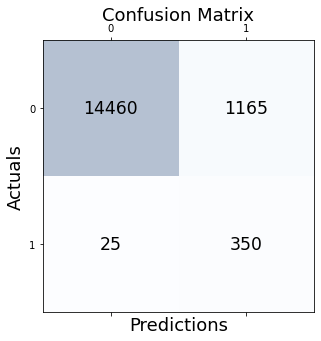

In [89]:
conf_matrix=confusion_matrix(test_labels, yy_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

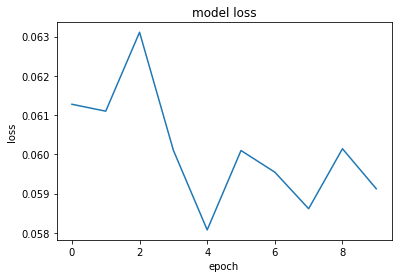

In [56]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AREA UNDER ROC:  0.9293866666666667


<function matplotlib.pyplot.show>

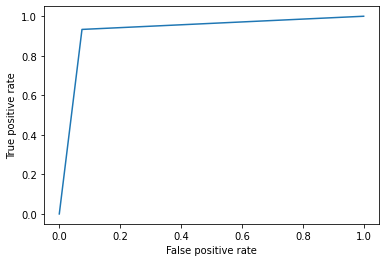

In [57]:
#AUROC
ann_auc=roc_auc_score(test_labels,yy_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,yy_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

##Building a Multi-Layer Perceptron

In [58]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [59]:
# Fit data onto the model for train/val set
clf.fit(X_train, y_train)
yyy_pred_t=clf.predict(X_test)

Iteration 1, loss = 0.50425517
Iteration 2, loss = 0.27656967
Iteration 3, loss = 0.17562760
Iteration 4, loss = 0.15866292
Iteration 5, loss = 0.15021747
Iteration 6, loss = 0.14663912
Iteration 7, loss = 0.14276067
Iteration 8, loss = 0.13749117
Iteration 9, loss = 0.13706433
Iteration 10, loss = 0.13089497
Iteration 11, loss = 0.12567130
Iteration 12, loss = 0.12099532
Iteration 13, loss = 0.11526137
Iteration 14, loss = 0.11314034
Iteration 15, loss = 0.11222212
Iteration 16, loss = 0.11067863
Iteration 17, loss = 0.10335746
Iteration 18, loss = 0.09828689
Iteration 19, loss = 0.09647894
Iteration 20, loss = 0.09590054
Iteration 21, loss = 0.09433529
Iteration 22, loss = 0.09095115
Iteration 23, loss = 0.08927393
Iteration 24, loss = 0.09205971
Iteration 25, loss = 0.08959081
Iteration 26, loss = 0.08824625
Iteration 27, loss = 0.09179765
Iteration 28, loss = 0.08405211
Iteration 29, loss = 0.08479730
Iteration 30, loss = 0.08242633
Iteration 31, loss = 0.08198575
Iteration 32, los

In [60]:
#Evaluating the Multi-Layer Perceptron (validation data set)
yyy_pred_t = (yyy_pred_t > 0.5)
report = classification_report(y_test, yyy_pred_t)
print(report)
cm = confusion_matrix(y_test, yyy_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       253
           1       0.93      0.88      0.90        97

    accuracy                           0.95       350
   macro avg       0.94      0.93      0.93       350
weighted avg       0.95      0.95      0.95       350

Total cost is: 6060.0


In [61]:
# Fit data onto the model 
history=clf.fit(best_train_features_balanced, train_labels_balanced)
yyy_pred=clf.predict(best_test_features)

Iteration 1, loss = 0.48402530
Iteration 2, loss = 0.24355003
Iteration 3, loss = 0.16916106
Iteration 4, loss = 0.15472925
Iteration 5, loss = 0.14848321
Iteration 6, loss = 0.14543073
Iteration 7, loss = 0.13960430
Iteration 8, loss = 0.13616223
Iteration 9, loss = 0.13320848
Iteration 10, loss = 0.12878671
Iteration 11, loss = 0.12615120
Iteration 12, loss = 0.12260172
Iteration 13, loss = 0.12020197
Iteration 14, loss = 0.11560584
Iteration 15, loss = 0.11214876
Iteration 16, loss = 0.11079987
Iteration 17, loss = 0.11248937
Iteration 18, loss = 0.10579824
Iteration 19, loss = 0.10482858
Iteration 20, loss = 0.10106522
Iteration 21, loss = 0.09919784
Iteration 22, loss = 0.09789835
Iteration 23, loss = 0.09754377
Iteration 24, loss = 0.09685513
Iteration 25, loss = 0.09401387
Iteration 26, loss = 0.09318343
Iteration 27, loss = 0.09471405
Iteration 28, loss = 0.09250815
Iteration 29, loss = 0.09087252
Iteration 30, loss = 0.09048084
Iteration 31, loss = 0.08853518
Iteration 32, los

In [62]:
#Evaluating the Multi-Layer Perceptron (test data set)
yyy_pred = (yyy_pred > 0.5)
report = classification_report(test_labels, yyy_pred)
print(report)
cm = confusion_matrix(test_labels, yyy_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.52      0.90      0.66       375

    accuracy                           0.98     16000
   macro avg       0.76      0.94      0.82     16000
weighted avg       0.99      0.98      0.98     16000

Total cost is: 22140.0


In [63]:
confusion_matrix(test_labels, yyy_pred)

array([[15311,   314],
       [   38,   337]])

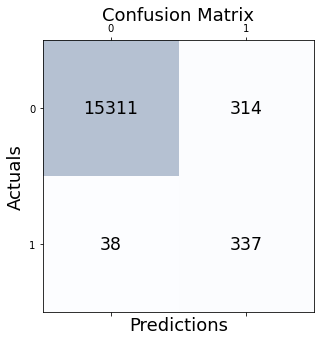

In [90]:
conf_matrix=confusion_matrix(test_labels, yyy_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

AREA UNDER ROC:  0.9392853333333333


<function matplotlib.pyplot.show>

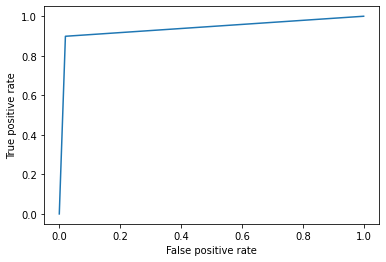

In [65]:
#AUROC
ann_auc=roc_auc_score(test_labels,yyy_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,yyy_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

##Artificial neural network [different layers 60,30,15 ,1]

In [66]:
#creating layers and setting the activation function
model = Sequential([
    Dense(60, activation='relu', input_dim=160 ),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [67]:
#compiler settings for the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10)
yyyy_pred_t = model.predict(X_test)

Epoch 1/10
315/315 [==============================] - 1s 2ms/step - loss: 0.2426 - accuracy: 0.9375
Epoch 2/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1453 - accuracy: 0.9505
Epoch 3/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1310 - accuracy: 0.9562
Epoch 4/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1191 - accuracy: 0.9590
Epoch 5/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1121 - accuracy: 0.9635
Epoch 6/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9613
Epoch 7/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9663
Epoch 8/10
315/315 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9660
Epoch 9/10
315/315 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9673
Epoch 10/10
315/315 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9724

In [69]:
#Evaluating the Artificial n n (basic) (Validation data set)
yyyy_pred_t = (yyyy_pred_t > 0.5)
report = classification_report(y_test, yyyy_pred_t)
print(report)
cm = confusion_matrix(y_test, yyyy_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       253
           1       0.92      0.94      0.93        97

    accuracy                           0.96       350
   macro avg       0.95      0.95      0.95       350
weighted avg       0.96      0.96      0.96       350

Total cost is: 3080.0


In [70]:
history=model.fit(best_train_features_balanced, train_labels_balanced, batch_size = 10, epochs = 10)
yyyy_pred = model.predict(best_test_features)


Epoch 1/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9717
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9709
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9729
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9751
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9766
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9737
Epoch 7/10
350/350 [==============================] - 2s 5ms/step - loss: 0.0723 - accuracy: 0.9766
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.9780
Epoch 9/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0623 - accuracy: 0.9791
Epoch 10/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9800

In [71]:
#Evaluating the Artificial n n (basic) (Test data set)
yyyy_pred = (yyyy_pred > 0.5)
report = classification_report(test_labels, yyyy_pred)
print(report)
cm = confusion_matrix(test_labels, yyyy_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.65      0.89      0.75       375

    accuracy                           0.99     16000
   macro avg       0.82      0.94      0.87     16000
weighted avg       0.99      0.99      0.99     16000

Total cost is: 23280.0


In [72]:
confusion_matrix(test_labels, yyyy_pred)

array([[15447,   178],
       [   43,   332]])

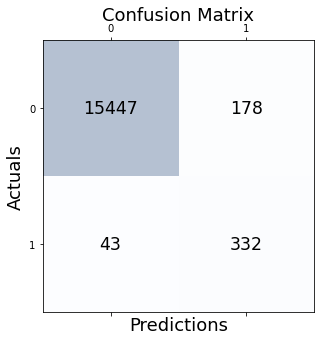

In [87]:
conf_matrix=confusion_matrix(test_labels, yyyy_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

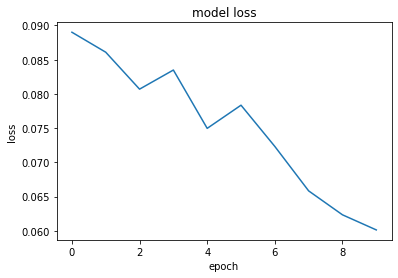

In [74]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AREA UNDER ROC:  0.9369706666666667


<function matplotlib.pyplot.show>

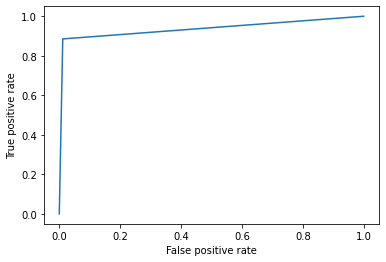

In [75]:
#AUROC
ann_auc=roc_auc_score(test_labels,yyyy_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,yyyy_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

##Artificial neural network [different layers 64,32,16 ,1]

In [76]:
model = Sequential([
    Dense(64, activation='relu', input_dim=160 ),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [77]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [78]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10)
y5_pred_t = model.predict(X_test)

Epoch 1/10
315/315 [==============================] - 1s 2ms/step - loss: 0.2627 - accuracy: 0.9403
Epoch 2/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1483 - accuracy: 0.9502
Epoch 3/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1357 - accuracy: 0.9537
Epoch 4/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1232 - accuracy: 0.9571
Epoch 5/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9606
Epoch 6/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9625
Epoch 7/10
315/315 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9683
Epoch 8/10
315/315 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9667
Epoch 9/10
315/315 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9692
Epoch 10/10
315/315 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9714

In [79]:
#Evaluating the Artificial neural network [different layers 64,32,16 ,1] (validation data set)
y5_pred_t = (y5_pred_t > 0.5)
report = classification_report(y_test, y5_pred_t)
print(report)
cm = confusion_matrix(y_test, y5_pred_t).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       253
           1       0.94      0.93      0.93        97

    accuracy                           0.96       350
   macro avg       0.95      0.95      0.95       350
weighted avg       0.96      0.96      0.96       350

Total cost is: 3560.0


In [80]:
history= model.fit(best_train_features_balanced, train_labels_balanced, batch_size = 10, epochs = 10)
y5_pred = model.predict(best_test_features)

Epoch 1/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9700
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9726
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9711
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9743
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9751
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9780
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9763
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9777
Epoch 9/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.9780
Epoch 10/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9786

In [81]:
#Evaluating the Artificial neural network [different layers 64,32,16 ,1] (test data set)
y5_pred = (y5_pred > 0.5)
report = classification_report(test_labels, y5_pred)
print(report)
cm = confusion_matrix(test_labels, y5_pred).ravel()
cm = pd.DataFrame(cm.reshape((1,4)), columns=['tn', 'fp', 'fn', 'tp'])
total_cost = 10*cm.fp + 500*cm.fn
print(f'Total cost is: {float(total_cost.values[0])}')

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15625
           1       0.46      0.96      0.62       375

    accuracy                           0.97     16000
   macro avg       0.73      0.97      0.80     16000
weighted avg       0.99      0.97      0.98     16000

Total cost is: 11720.0


In [82]:
confusion_matrix(test_labels, y5_pred)

array([[15203,   422],
       [   15,   360]])

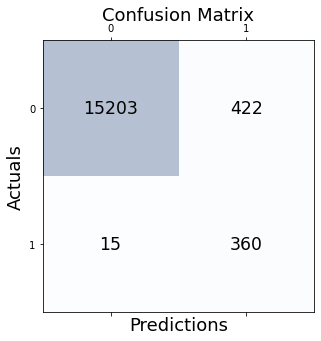

In [91]:
conf_matrix=confusion_matrix(test_labels, y5_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

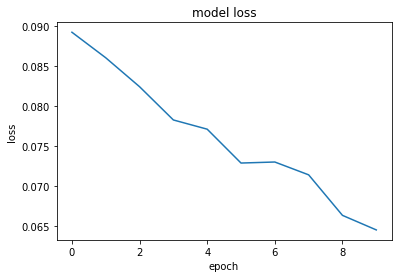

In [84]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

AREA UNDER ROC:  0.9664959999999999


<function matplotlib.pyplot.show>

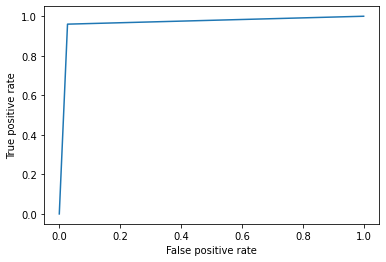

In [85]:
#AUROC
ann_auc=roc_auc_score(test_labels,y5_pred)
print("AREA UNDER ROC: ",ann_auc)
ann_fpr,ann_tpr,_ =roc_curve(test_labels,y5_pred)
plt.plot(ann_fpr,ann_tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show